<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Forward-Euler" data-toc-modified-id="Forward-Euler-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Forward Euler</a></span></li></ul></div>

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


# Numerisk integration og det skrå kast
Dette er et kort sæt opgaver, hvor vi har tænkt os at udforske, hvad det vil sige at benytte computere til numerisk integration, og hvordan vi kan forbedre det. Jeg vil her benytte det skrå kast som eksempelv, men prøv endelig med dit eget yndlingssæt af differentialligninger.

## Forward Euler
Forward Euler er den helt klassiske form for numerisk integration, så det er et godt sted at starte. Vi benytter ved numerisk integration, at vi blot kan gøre tidsskridtene meget små og derved få en ret præcis precision. Så hvis vi eksempelvis har en sammenhæng mellem en konstant acceleration og position:
$$ \frac{d^2x}{dt^2} = a $$

Så vil vi i numerisk integration skrive dette ved småtidsskridt $\Delta t$. Vi får altså:
$$ v_{n+1} = v_{n} + \Delta t \cdot a_{n+1} \; \; \; \; x_{n+1} = x_n + \Delta t v_{n+1}$$

Inden vi begynder at programmere, lad os lige starte med at lave lidt matematik. Vi starter med at se bort fra luftmodstand, men det vil vi selvfølgelig sætte på senere.

__Opgave 1__
_Opskriv differentialligningerne, som beskriver det skrå kast (altså både x og y. Og opskriv dem ligedeles recursivt, som gjort i ligning 2._

Det jeg var interreseret i var følgende:
For acceleration:
$$ \frac{d^2x}{dx^2} = 0 \; \; \; \frac{d^2y}{dx^2} = -g \; \; \;$$

Vi kan nu opskrive det recursivt:
$$ v_{x n+1} = v_{x  n} \; \; \; v_{y n+1} = v_{y n} - g \Delta t$$

og for positionerne:
$$ x_{n+1} = x_n + v_{x n+1} \Delta t \; \; \;  y_{n+1} = y_n + v_{y n+1} \Delta t$$

Nu har vi differentialligningerne på en form, som virker godt til at kode med. Vi vil derfor skrive en funktion, der kan regne dette ud for os. Først vil jeg dog lige foreslå at indskrive nogle konstanter, herunder g og $\Delta t$. For nu sætter vi dem blot til $g = -9.8$ og $\Delta t = 0.05$, men leg gerne med disse værdier.

In [54]:
g = 9.8
dt = 0.05

\begin{exercise}
    Skriv en funktion, der tager $x, y, v_x, v_y$ som input og returnere næste iteration af dem. \textit{(Dette virker måske lidt som overkill, men det er en god måde at vende sig til at arbejde på. Det bliver især tydeligt, når vi tilføjer luftmodstand)} 
\end{exercise}

Herunder har jeg opskrevet to updates til et forslag til, hvordan sådan en update funktion kunne se ud. Den er måske lidt mere kringlet end nødvendig, men det er er en form, der kommer os til gavn senere. Så længe din funktion gør det samme, så er du godt med!

In [28]:
def update(x, y, v_x, v_y):
    a_x = 0
    a_y = - g
    v_x = v_x
    v_y += a_y*dt
    x += v_x * dt
    y += v_y * dt
    return x, y, v_x, v_y

Nu skal vi så blot vores update funktion af:
\begin{exercise}
Giv nogle realistiske start gæt for $x, y, v_x$ og $v_y$ samt en tom liste for $x$ og $y$. Kør nu update funktionen et sted mellem 100-1000 gange og gem x og y værdierne i en liste. Når du har gjort dette, så plot figurene, og se om det ser nogenlunde ud.
\end{exercise}

Vi starter med at definere startbetingelserne og gøre nogle tomme arrays klar. (det er hurtigere at benytte numpy arrays fyldt med nuller og blot ændre indgangene, men det vil jeg lade dig, lege med senere:

In [55]:
x, y, v_x, v_y = 0, 0, 5, 5

xs, ys = [x], [y]

for _ in range(N):
    x, y, v_x, v_y = update(x, y, v_x, v_y)
    xs.append(x)
    ys.append(y)

Nu kan vi forsøge at plotte det:

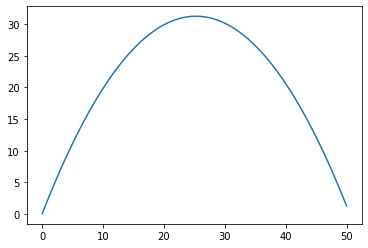

In [5]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

Nedenunder er jeg kommet med et forslag til, hvorledes det kan skrives op. Dette virker måske lidt strengent, men det er vigtigt at bemærke, hvordan vi definere den højeste orden af differentiale først og så blot arbejder os ned af. Vi kan nemlig altid bestemme accelerationen ud fra position og hastighed (ellers skal vi nok finde et andet værktøj):

In [3]:
def update(x, y, v_x, v_y):
    a_y = - g
    a_x = 0
    v_y += -g * dt
    v_x = v_x
    y += v_y * dt
    x += v_x * dt
    return x, y, v_x, v_y